In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split
from mlxtend.plotting import plot_decision_regions
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# A simple toy dataset to visualize clustering and classification algorithms
X, y = make_moons(n_samples=200, noise=0.25, random_state=42)


In [14]:
X[0:3]

array([[-1.13563211,  0.0212179 ],
       [ 0.97379069,  0.45638148],
       [ 0.77188112,  0.52712781]])

In [12]:
y[0:3]

array([0, 0, 0])

In [ ]:
y

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
## The purpose of the pipeline is to assemble several steps that can be cross-validated together while 
# setting different parameters.
model_linear = Pipeline([ 
    ('scaler', StandardScaler()), # Standardize features by removing the mean and scaling to unit variance.
    ('logreg', LogisticRegression()) 
])
model_linear.fit(X_train, y_train)
model_linear

,steps,"[('scaler', ...), ('logreg', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0


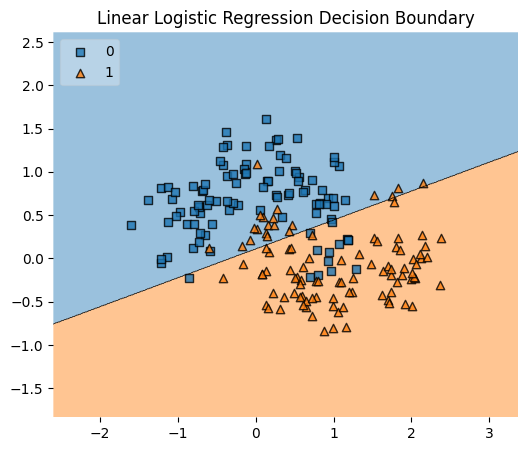

In [10]:
plt.figure(figsize=(6, 5))
plot_decision_regions(X, y, clf=model_linear, legend=2)
plt.title("Linear Logistic Regression Decision Boundary")
plt.show()

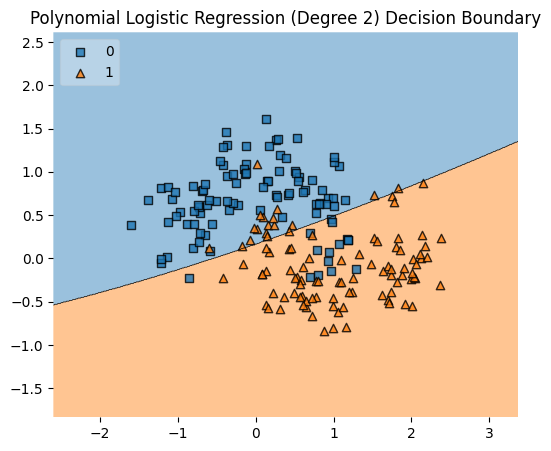

In [16]:
model_poly = Pipeline([
    ('poly', PolynomialFeatures(degree=2)),
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression())
])
model_poly.fit(X_train, y_train)

plt.figure(figsize=(6, 5))
plot_decision_regions(X, y, clf=model_poly, legend=2)
plt.title("Polynomial Logistic Regression (Degree 2) Decision Boundary")
plt.show()

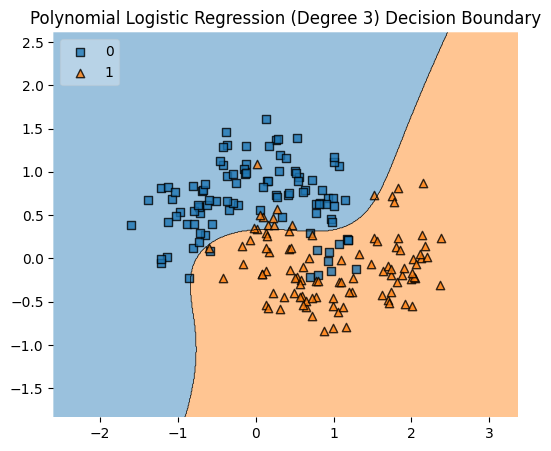

In [17]:
model_poly = Pipeline([
    ('poly', PolynomialFeatures(degree=3)),
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression())
])
model_poly.fit(X_train, y_train)

plt.figure(figsize=(6, 5))
plot_decision_regions(X, y, clf=model_poly, legend=2)
plt.title("Polynomial Logistic Regression (Degree 3) Decision Boundary")
plt.show()

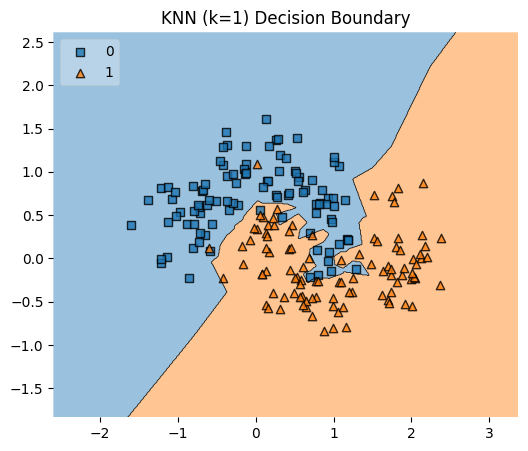

In [19]:
knn_1 = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier(n_neighbors=1))
])
knn_1.fit(X_train, y_train)

plt.figure(figsize=(6, 5))
plot_decision_regions(X, y, clf=knn_1, legend=2)
plt.title("KNN (k=1) Decision Boundary")
plt.show()

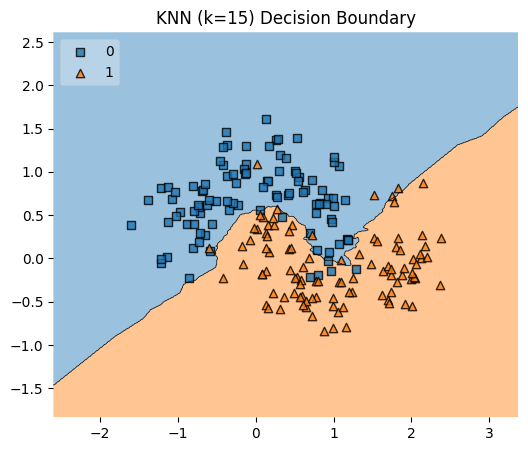

In [23]:
knn_15 = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier(n_neighbors=15))
])
knn_15.fit(X_train, y_train)

plt.figure(figsize=(6, 5))
plot_decision_regions(X, y, clf=knn_15, legend=2)
plt.title("KNN (k=15) Decision Boundary")
plt.show()

In [ ]:
#Plynomial features with KNN model.
knn_poly = Pipeline([
    ('poly', PolynomialFeatures(degree=2)),
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier(n_neighbors=5))
])
knn_poly.fit(X_train, y_train)

plt.figure(figsize=(6, 5))
plot_decision_regions(X, y, clf=knn_poly, legend=2)
plt.title("KNN with Polynomial Features (k=5)")
plt.show()
